In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import zipfile

In [ ]:
tf.random.set_seed(42)
print('Tensorflow version', tf.__version__)

Tensorflow version 2.19.0


In [ ]:
#Download DataSet from Kaggle.com
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:00<00:00, 1.61GB/s]
100% 163M/163M [00:00<00:00, 1.58GB/s]


In [ ]:
with zipfile.ZipFile('face-mask-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(".")

In [ ]:
base_dir="data"
print("DataSet Folders: ",os.listdir(base_dir))

DataSet Folders:  ['with_mask', 'without_mask']


In [ ]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2 #(20% for testing, 80% for training)
                            )
train_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32, class_mode='binary' , subset='training',seed=42)

Found 6043 images belonging to 2 classes.


In [ ]:
test_data=datagen.flow_from_directory(base_dir, target_size=(224,224), batch_size=32, class_mode='binary', subset='validation', seed=42)

Found 1510 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 220, 220, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 106, 106, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,281 (9.90 MB)

 Trainable params: 2,595,281 (9.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
 15/189 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9385 - loss: 0.1529

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9508 - loss: 0.1334 - val_accuracy: 0.8404 - val_loss: 0.3979
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9404 - loss: 0.1648 - val_accuracy: 0.9563 - val_loss: 0.1428
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.9699 - loss: 0.0735 - val_accuracy: 0.9464 - val_loss: 0.2544
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.9743 - loss: 0.0668 - val_accuracy: 0.9642 - val_loss: 0.1632
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9842 - loss: 0.0464 - val_accuracy: 0.9483 - val_loss: 0.2476


In [ ]:
#Evaluate
loss,accuracy=model.evaluate(test_data)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9477 - loss: 0.2443
Loss: 0.24760960042476654
Accuracy: 0.948344349861145


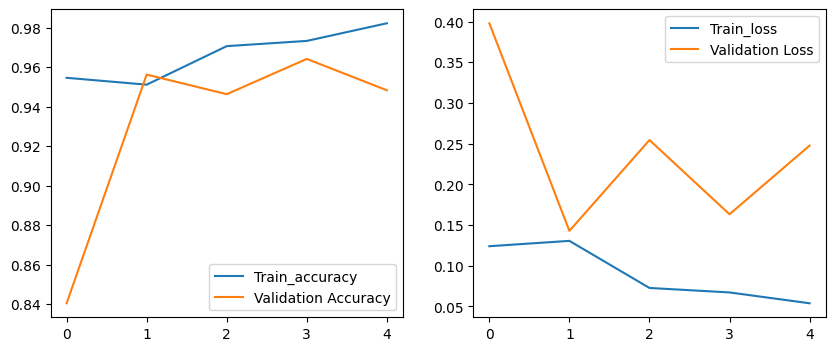

In [ ]:
#plot Accuracy and Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train_accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


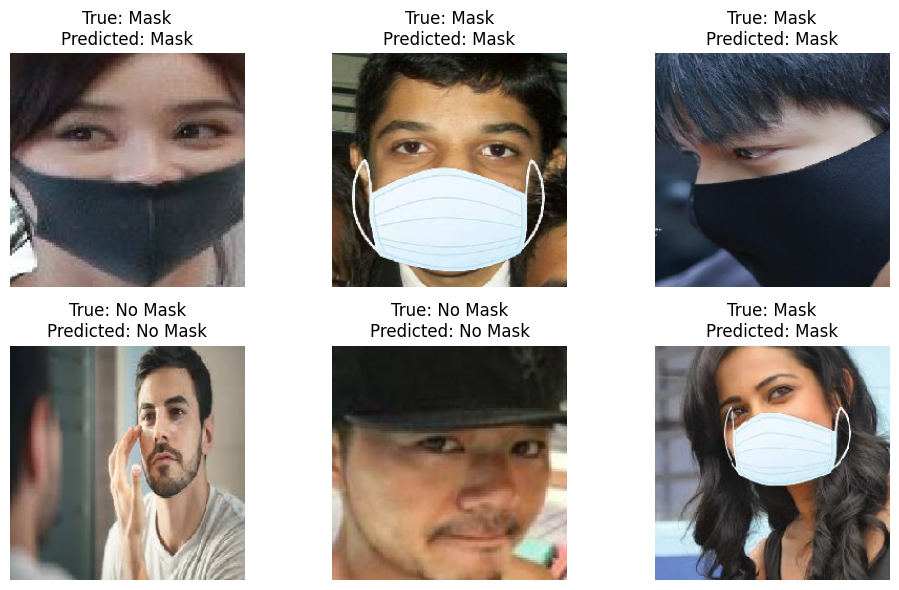

In [ ]:
images,labels=next(test_data)
predictions=model.predict(images)
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    true_label="Mask" if labels[i]==0 else "No Mask"
    predicted_label="Mask" if predictions[i]<0.5 else "No Mask"
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Saving ChatGPT Image Nov 7, 2025, 10_53_50 AM.png to ChatGPT Image Nov 7, 2025, 10_53_50 AM.png
File Uploaded: ChatGPT Image Nov 7, 2025, 10_53_50 AM.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction :  No Mask
Confidence :  91.105095 %


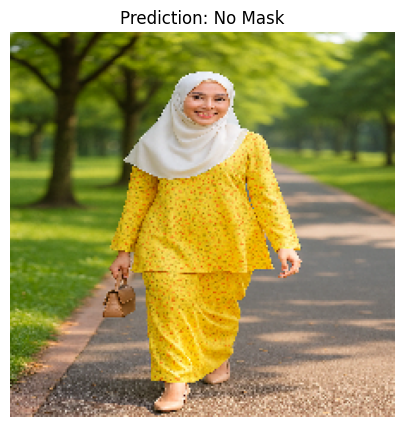

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  img_path=fn
  print('File Uploaded:',img_path)
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)/255.0

  pred=model.predict(img_array)[0][0]
  label="Mask" if pred<0.5 else "No Mask"
  print("Prediction : ",label)
  print("Confidence : ",100*(1-pred) if pred<0.5 else 100*pred,"%")

  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.title(f"Prediction: {label}")
  plt.axis('off')
  plt.show()